In [2]:
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
from models.GAN.Generator import Generator
from training.train_utils import get_batches_from_path, make_dataloader
from PIL import Image

In [6]:
PATH = "./datasets/horse2zebra"

In [ ]:
g = Generator()
states = torch.load("checkpoint_generator_400.pt")
model_state = states["model_state_dict"]
g.load_state_dict(model_state)
g.eval()

In [22]:
batches_by_class = get_batches_from_path(PATH)
X_class_name = "testA"
X_test_dataloader = make_dataloader(batches_by_class, X_class_name)
fake_images = []

for minibatch in X_test_dataloader:
    for test_image in minibatch:
        test_image = torch.unsqueeze(test_image, 0)
        out = g(test_image)
        out = torch.squeeze(out, 0)
        img = T.ToPILImage()(out)
        fake_images.append(img)

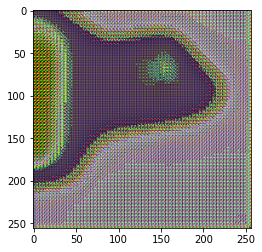

In [32]:
plt.imshow(fake_images[0])

In [1]:
for param in g.parameters():
    print(g.requires_grad)

NameError: name 'g' is not defined

In [ ]:
# plot loss histories

In [ ]:
# Run trained generator on validation images from class X
path_to_val = path + output_folder + "/val"
X_val_dataloader = make_dataloader(batches_by_class, X_class_name)


In [ ]:
# visualize a few of the images
n_display = 3
for i in range(n_display):
    plt.imshow(fake_images[i])

In [ ]:
# Run FID metric to quantify similarity between generated images and target class.
# see: https://github.com/mseitzer/pytorch-fid

In [ ]:
# Model at this point looks good, so let's save it
path_to_save = None
torch.save(generator.state_dict(), path_to_save)